# Machine Learning Classifiers
### Stopwords from Sastrawi
### Vectorizer Tf-Idf
### Classifier: K-Nearest Neighbors, Decision Tree

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from nltk import stopwords

ImportError: cannot import name 'stopwords' from 'nltk' (c:\Users\Axioo Pongo\.conda\envs\py310\lib\site-packages\nltk\__init__.py)

In [ ]:
df = pd.read_csv('Dataset Twitter Fix - Indonesian Sentiment Twitter Dataset Labeled (1).csv')
df

,sentimen,Tweet
0,0.0,barusan liat tulisan di belakang truk rela inj...
1,0.0,her itu lho miss kevin sama keven rebutan gimb...
2,0.0,iya rep gatau aku masih kelas 4 sd ehh di block
3,0.0,aku mohon tepatilah janjimu penantiancintaeps19
4,0.0,bukan beria nk kahwin sbb gatal celah kangkang...
...,...,...
12642,6.0,"Jangan dibahas dong, udah paham aja kan di kau..."
12643,6.0,di agama lo nyembah nya siapa sih? masa Tuhan ...
12644,6.0,"Katanya demi kemanusiaan, kemanusiaan milik ma..."
12645,6.0,Orang timur kurang pintar dari orang barat


## Preprocessing Dataset

In [ ]:
df

,sentimen,Tweet
0,0.0,barusan liat tulisan di belakang truk rela inj...
1,0.0,her itu lho miss kevin sama keven rebutan gimb...
2,0.0,iya rep gatau aku masih kelas 4 sd ehh di block
3,0.0,aku mohon tepatilah janjimu penantiancintaeps19
4,0.0,bukan beria nk kahwin sbb gatal celah kangkang...
...,...,...
12642,6.0,"Jangan dibahas dong, udah paham aja kan di kau..."
12643,6.0,di agama lo nyembah nya siapa sih? masa Tuhan ...
12644,6.0,"Katanya demi kemanusiaan, kemanusiaan milik ma..."
12645,6.0,Orang timur kurang pintar dari orang barat


In [ ]:
df['sentimen'].value_counts()

sentimen
0.0    5327
2.0    4188
1.0    2792
4.0     152
6.0     100
3.0      58
5.0      29
Name: count, dtype: int64

In [ ]:
# drop columns with na
df = df.dropna()

# Convert 'sentimen' to from float to int
df['sentimen'] = df['sentimen'].astype(int)

# 
modify = {1:0, 2:1, 3:1, 4:1, 5:1, 6:1}
df['sentimen'] = df['sentimen'].map(modify)

df1 = df[df['sentimen'] == 1]
df0 = df[df['sentimen'] == 0]

df1 = df1.sample(2792)
df = pd.concat([df0, df1])
df['sentimen'] = df['sentimen'].astype(int)

C:\Users\Axioo Pongo\AppData\Local\Temp\ipykernel_16640\694262717.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentimen'] = df['sentimen'].astype(int)
C:\Users\Axioo Pongo\AppData\Local\Temp\ipykernel_16640\694262717.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentimen'] = df['sentimen'].map(modify)


In [ ]:
df

,sentimen,Tweet
5327,0,doa rezeki tak putus inna haa zaa larizquna ma...
5328,0,makasih loh ntar kita bagi hasil aku 99 9 sisa...
5329,0,ya aku akan menjadi satu satunya bukan nomor s...
5330,0,i dont know why but these zikir sangat membant...
5331,0,aah kamu aja mas aku lebih suka diayomi
...,...,...
8407,1,"Puisi kampungan! Sudahlah bodoh ilmu dunia, bo..."
8125,1,Gue ingin memberikan opini gue tentang marah-m...
11365,1,kasian tp kamu memang bully able dek
10788,1,capek juga lihat cara2 mereka seperti begitu


In [ ]:
# Value count of 'sentimen'
df['sentimen'].value_counts()

sentimen
0    2792
1    2792
Name: count, dtype: int64

## Preprocessing Text

In [ ]:
import re
import string
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory


In [ ]:
# Stop Words dari Sastrawi & NLTK
stop_words_id = StopWordRemoverFactory().get_stop_words()
stop_words_en = list(stopwords.words('english'))

stop_words = stop_words_id + stop_words_en
print(stop_words)

['yang',
 'untuk',
 'pada',
 'ke',
 'para',
 'namun',
 'menurut',
 'antara',
 'dia',
 'dua',
 'ia',
 'seperti',
 'jika',
 'jika',
 'sehingga',
 'kembali',
 'dan',
 'tidak',
 'ini',
 'karena',
 'kepada',
 'oleh',
 'saat',
 'harus',
 'sementara',
 'setelah',
 'belum',
 'kami',
 'sekitar',
 'bagi',
 'serta',
 'di',
 'dari',
 'telah',
 'sebagai',
 'masih',
 'hal',
 'ketika',
 'adalah',
 'itu',
 'dalam',
 'bisa',
 'bahwa',
 'atau',
 'hanya',
 'kita',
 'dengan',
 'akan',
 'juga',
 'ada',
 'mereka',
 'sudah',
 'saya',
 'terhadap',
 'secara',
 'agar',
 'lain',
 'anda',
 'begitu',
 'mengapa',
 'kenapa',
 'yaitu',
 'yakni',
 'daripada',
 'itulah',
 'lagi',
 'maka',
 'tentang',
 'demi',
 'dimana',
 'kemana',
 'pula',
 'sambil',
 'sebelum',
 'sesudah',
 'supaya',
 'guna',
 'kah',
 'pun',
 'sampai',
 'sedangkan',
 'selagi',
 'sementara',
 'tetapi',
 'apakah',
 'kecuali',
 'sebab',
 'selain',
 'seolah',
 'seraya',
 'seterusnya',
 'tanpa',
 'agak',
 'boleh',
 'dapat',
 'dsb',
 'dst',
 'dll',
 'dahulu

In [ ]:
def preprocess_text(review):
    review = re.sub(r"http\S+", "", review)             # menghapus link website
    review = re.sub("\S*\d\S*", "", review).strip()     # proses menghapus nomor
    review = re.sub('[^A-Za-z]+', ' ', review)          # proses menghapus selain huruf
    review = review.translate(str.maketrans("","",string.punctuation)) #menghapus tanda baca
    review = review.lower()                             # proses case folding
    review = [word for word in review.split(" ") if not word in stop_words+['aku', 'kamu', 'mereka', 'kau']] # proses stop word
    review = " ".join(review)
    review.strip()
    return review

df['Tweet'] = df['Tweet'].apply(lambda x: preprocess_text(x))

In [ ]:
df

,sentimen,Tweet
5327,0,doa rezeki tak putus inna haa zaa larizquna ma...
5328,0,makasih loh ntar hasil sisanya buat
5329,0,menjadi satu satunya bukan nomor satu satu sat...
5330,0,i dont know why but these zikir sangat membant...
5331,0,aah aja mas lebih suka diayomi
...,...,...
8407,1,puisi kampungan sudahlah bodoh ilmu dunia bodo...
8125,1,gue memberikan opini gue marah marah jadi begi...
11365,1,kasian tp memang bully able dek
10788,1,capek lihat


#### Vectorizer

In [ ]:
vectorizer = TfidfVectorizer(use_idf=True)
X = vectorizer.fit_transform(df['Tweet'])
y = df['sentimen']
print(X)

  (0, 10097)	0.2811636385053439
  (0, 4888)	0.24765882280147145
  (0, 3800)	0.28898812203319485
  (0, 8834)	0.2568585727092425
  (0, 8536)	0.240377990440992
  (0, 6867)	0.28898812203319485
  (0, 7278)	0.28898812203319485
  (0, 6948)	0.28898812203319485
  (0, 14220)	0.28898812203319485
  (0, 4395)	0.26936530753177845
  (0, 5066)	0.2811636385053439
  (0, 10925)	0.2261604383727123
  (0, 12643)	0.126900433703971
  (0, 11160)	0.23255350691314108
  (0, 3411)	0.21293069241172471
  (1, 1987)	0.26191154304007147
  (1, 12191)	0.504348703239128
  (1, 4614)	0.41715230414876375
  (1, 9484)	0.41115739808214846
  (1, 7169)	0.40311681882866424
  (1, 7353)	0.41408345618550335
  (2, 9415)	0.34793120925226956
  (2, 2018)	0.18494377184212069
  (2, 11457)	0.6273927520155411
  (2, 11455)	0.6361222588937393
  :	:
  (5580, 8334)	0.17726070789966192
  (5580, 1146)	0.16048753532020624
  (5580, 5806)	0.1393024412573657
  (5580, 7497)	0.5824036831417178
  (5580, 10262)	0.14311683675488218
  (5580, 6529)	0.1190160

### Decision Tree Classifier

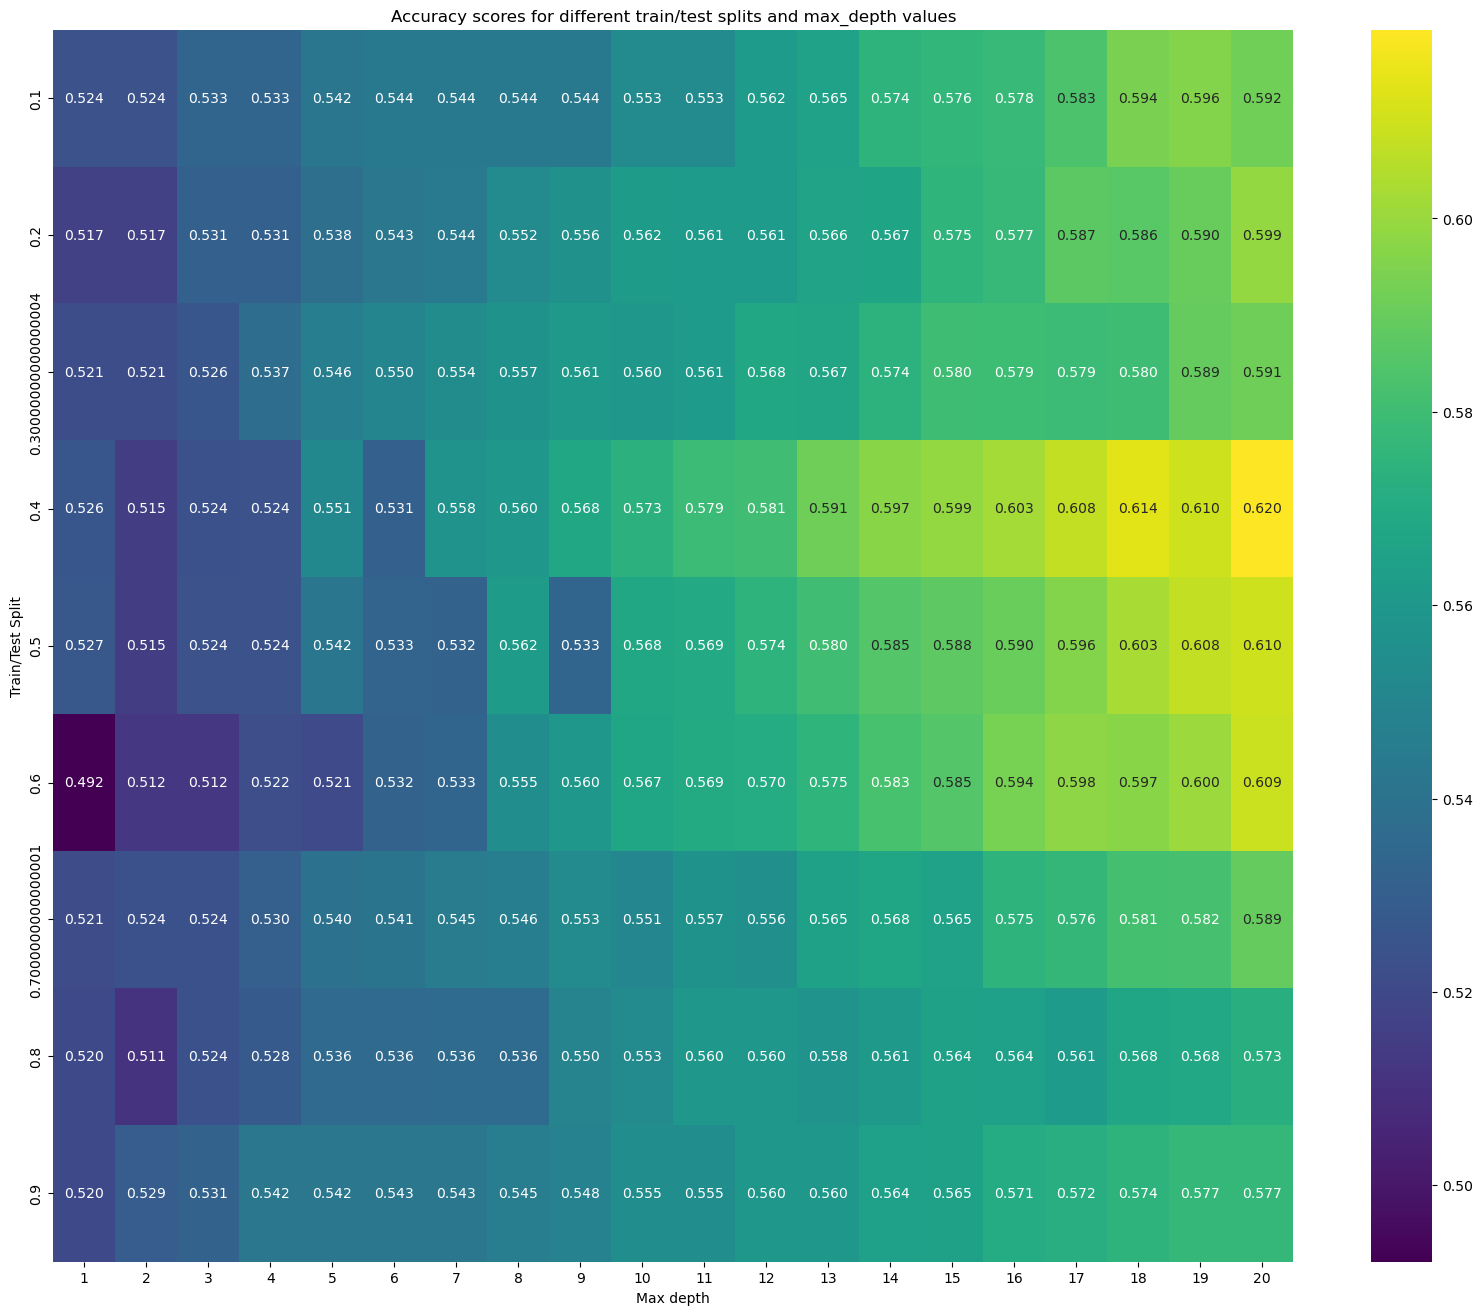

In [ ]:
# Assuming X and y are your features and target
best_score = 0
best_split = 0
best_depth = 0

# Assuming X and y are your features and target
split_values = np.arange(0.1, 1.0, 0.1)
depth_values = range(1, 21)

# Initialize a DataFrame to store the accuracy scores
accuracy_df = pd.DataFrame(index=split_values, columns=depth_values)

# Loop over possible train/test splits
for split in split_values:
    # Loop over possible max_depth values
    for depth in depth_values:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split, random_state=7)
        clf = DecisionTreeClassifier(max_depth=depth, random_state=7)
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        score = accuracy_score(y_test, predictions)
        accuracy_df.loc[split, depth] = pd.to_numeric(score)

# Plot the heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(accuracy_df.astype(float), annot=True, fmt=".3f", cmap='viridis')
plt.title('Accuracy scores for different train/test splits and max_depth values')
plt.xlabel('Max depth')
plt.ylabel('Train/Test Split')
plt.show()

### K-Nearest Neighbors Classifier

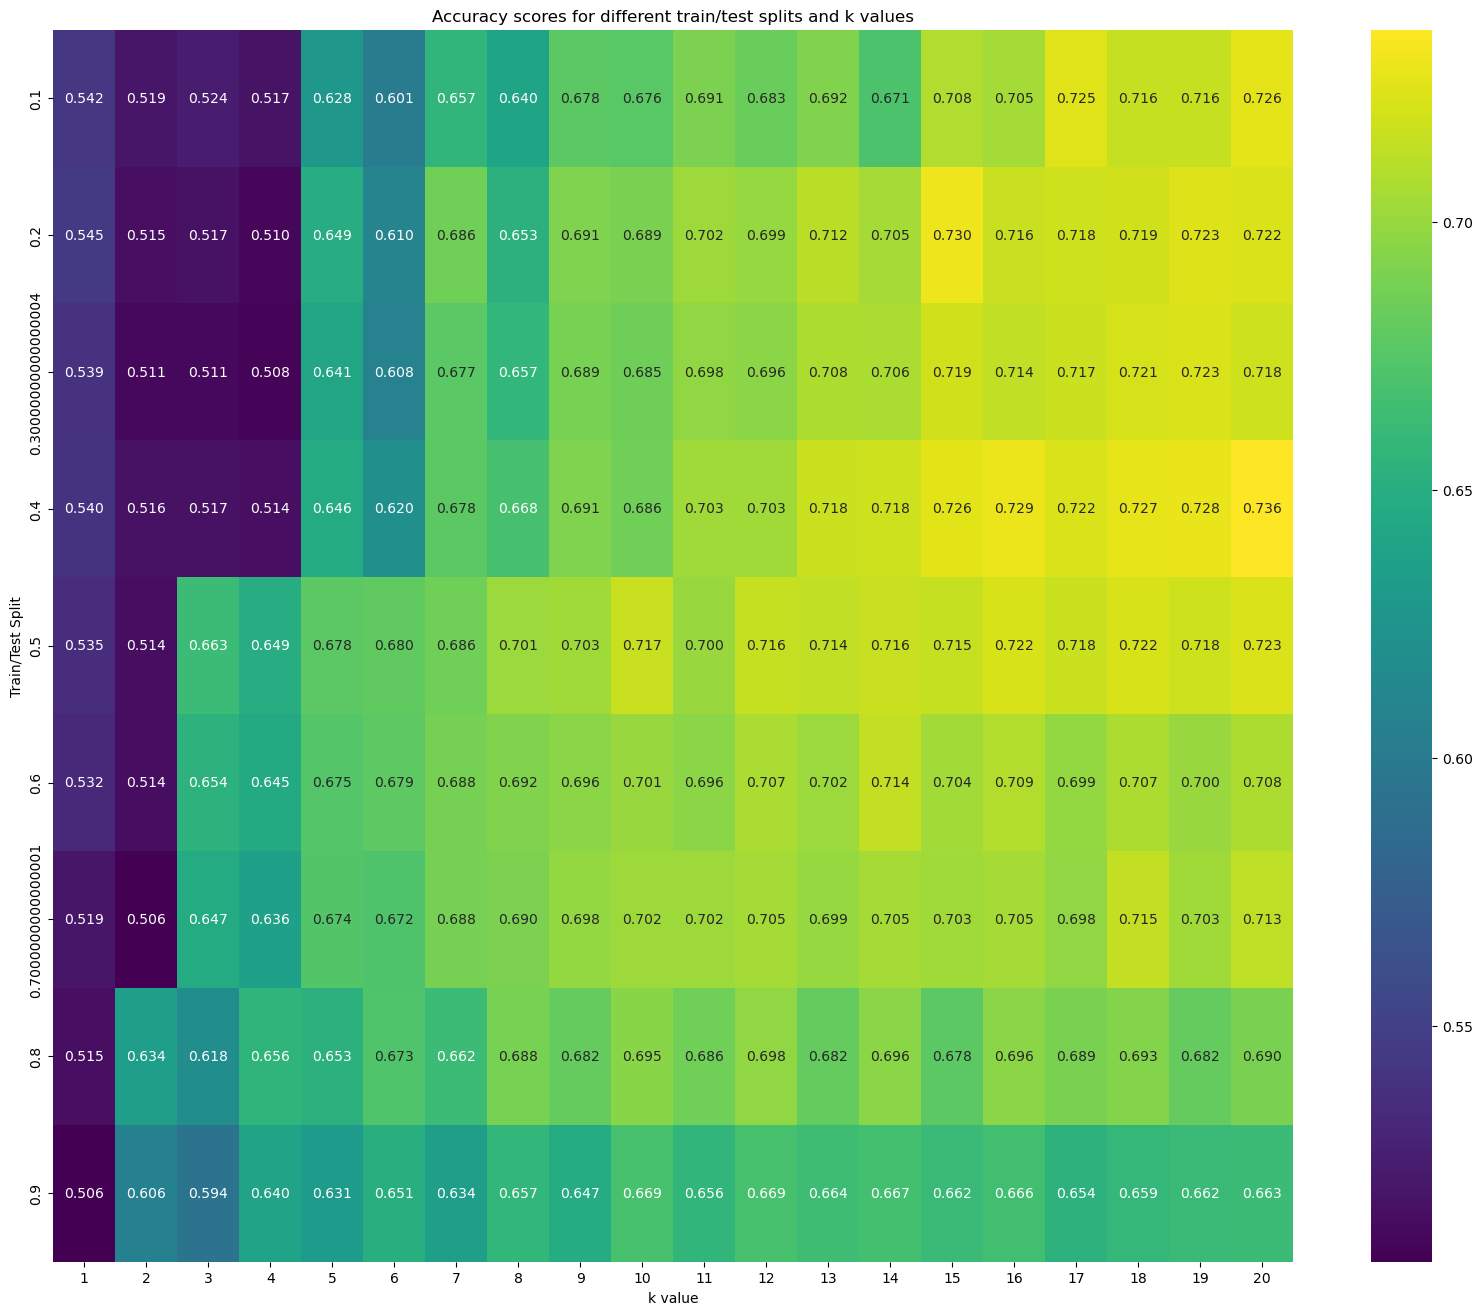

In [ ]:
split_values = np.arange(0.1, 1.0, 0.1)
k_values = range(1, 21)

accuracy_df = pd.DataFrame(index=split_values, columns=k_values)
sebelum = 0
# Loop over possible train/test splits
for split in split_values:
    # Loop over possible k values
    for k in k_values:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split, random_state=7)
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        predictions = knn.predict(X_test)
        score = accuracy_score(y_test, predictions)
        accuracy_df.loc[split, k] = score
        if score > sebelum:
            kmax = k
            tesmaxknn = split
            sebelum = score


# Plot the heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(accuracy_df.astype(float), annot=True, fmt=".3f", cmap='viridis')
plt.title('Accuracy scores for different train/test splits and k values')
plt.xlabel('k value')
plt.ylabel('Train/Test Split')
plt.show()

In [ ]:
# Best decision tree parameters:
## Split: 0.5
## Depth: 19
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=7)
tree = DecisionTreeClassifier(max_depth=20, random_state=7)
tree.fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print('Decision Tree Accuracy:', accuracy_score(y_test, pred_tree))
print('Decision Tree Confusion Matrix:'+ '\n', confusion_matrix(y_test, pred_tree))
print('Decision Tree Classification Report:' + '\n', classification_report(y_test, pred_tree))

Decision Tree Accuracy: 0.6090719188302
Decision Tree Confusion Matrix:
 [[1562  140]
 [1170  479]]
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.92      0.70      1702
           1       0.77      0.29      0.42      1649

    accuracy                           0.61      3351
   macro avg       0.67      0.60      0.56      3351
weighted avg       0.67      0.61      0.57      3351



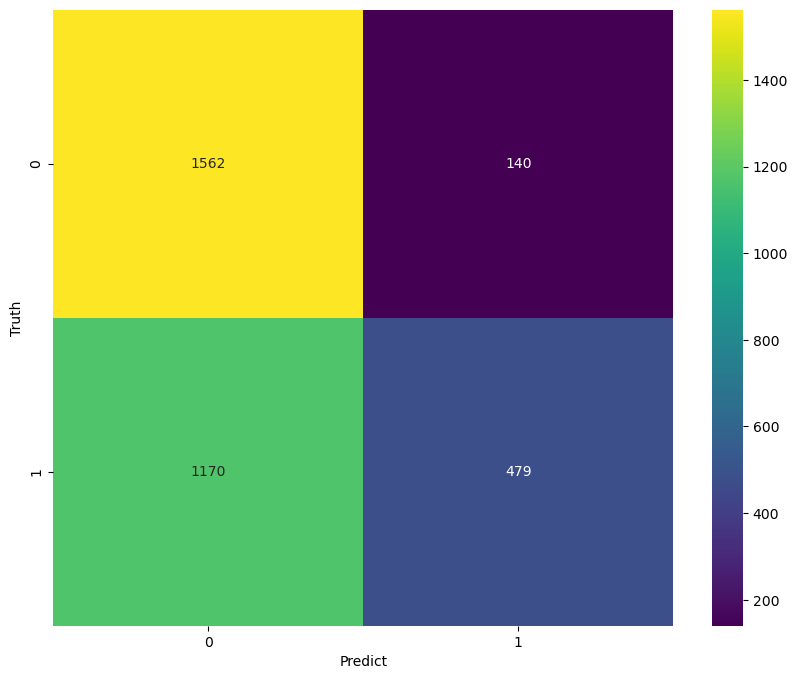

In [ ]:
cm = confusion_matrix(y_test, pred_tree)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')
plt.xlabel('Predict')
plt.ylabel('Truth')
plt.show()

In [ ]:
# Best KNN parameters:
## Split: 0.5
## k: 9
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=tesmaxknn, random_state=7)
knn = KNeighborsClassifier(n_neighbors=kmax)
print(kmax, tesmaxknn)
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)
print('KNN Accuracy:', accuracy_score(y_test, pred_knn))
print('KNN Confusion Matrix:'+ '\n', confusion_matrix(y_test, pred_knn))
print('KNN Classification Report:'+ '\n', classification_report(y_test, pred_knn))

20 0.4
KNN Accuracy: 0.7358997314234557
KNN Confusion Matrix:
 [[917 214]
 [376 727]]
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.81      0.76      1131
           1       0.77      0.66      0.71      1103

    accuracy                           0.74      2234
   macro avg       0.74      0.73      0.73      2234
weighted avg       0.74      0.74      0.73      2234



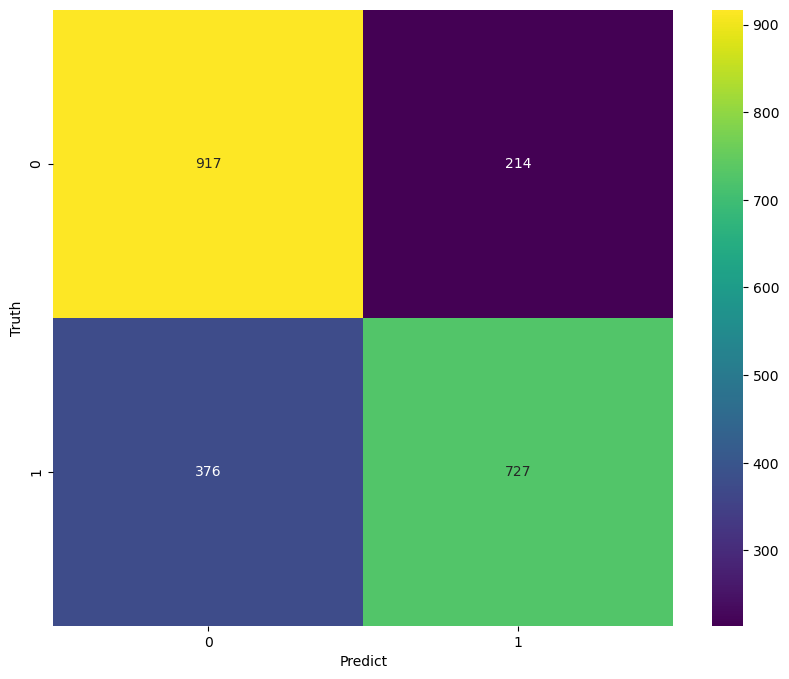

In [ ]:
cm = confusion_matrix(y_test, pred_knn)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')
plt.xlabel('Predict')
plt.ylabel('Truth')
plt.show()

In [ ]:
# SVC
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
svc = SVC(kernel='sigmoid')
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)
print('SVC Accuracy:', accuracy_score(y_test, pred_svc))
print('SVC Confusion Matrix:'+ '\n', confusion_matrix(y_test, pred_svc))
print('SVC Classification Report:'+ '\n', classification_report(y_test, pred_svc))

SVC Accuracy: 0.7717099373321397
SVC Confusion Matrix:
 [[455 126]
 [129 407]]
SVC Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.78      0.78       581
           1       0.76      0.76      0.76       536

    accuracy                           0.77      1117
   macro avg       0.77      0.77      0.77      1117
weighted avg       0.77      0.77      0.77      1117



In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)
print('Random Forest Accuracy:', accuracy_score(y_test, pred_rf))
print('Random Forest Confusion Matrix:'+ '\n', confusion_matrix(y_test, pred_rf))
print('Random Forest Classification Report:'+ '\n', classification_report(y_test, pred_rf))

Random Forest Accuracy: 0.7529095792300806
Random Forest Confusion Matrix:
 [[470 111]
 [165 371]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.81      0.77       581
           1       0.77      0.69      0.73       536

    accuracy                           0.75      1117
   macro avg       0.75      0.75      0.75      1117
weighted avg       0.75      0.75      0.75      1117



In [ ]:
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
nb = MultinomialNB()
nb.fit(X_train, y_train)
pred_nb = nb.predict(X_test)
print('Multinomial Naive Bayes Accuracy:', accuracy_score(y_test, pred_nb))
print('Multinomial Naive Bayes Confusion Matrix:'+ '\n', confusion_matrix(y_test, pred_nb))
print('Multinomial Naive Bayes Classification Report:'+ '\n', classification_report(y_test, pred_nb))

Multinomial Naive Bayes Accuracy: 0.7636526410026858
Multinomial Naive Bayes Confusion Matrix:
 [[422 159]
 [105 431]]
Multinomial Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.73      0.76       581
           1       0.73      0.80      0.77       536

    accuracy                           0.76      1117
   macro avg       0.77      0.77      0.76      1117
weighted avg       0.77      0.76      0.76      1117

